    No. Date(of entry) m/d/y Date(of exit) m/d/y  Date Variance in days  \
0   1.0           11/22/2023          12/15/2023                   23.0   
1   2.0           02/05/2024          02/26/2024                   21.0   
2   3.0            2/12/2024          03/06/2024                   23.0   
3   4.0            2/29/2024                 NaN               -45351.0   
4   5.0             3/5/2024                 NaN               -45356.0   
5   6.0           03/06/2024                 NaN                    NaN   
6   NaN                  NaN                 NaN                    NaN   
7   NaN                  NaN                 NaN                    NaN   
8   NaN                  NaN                 NaN                    NaN   
9   NaN                  NaN                 NaN                    NaN   
10  NaN                  NaN                 NaN                    NaN   
11  NaN                  NaN                 NaN                    NaN   
12  NaN                  

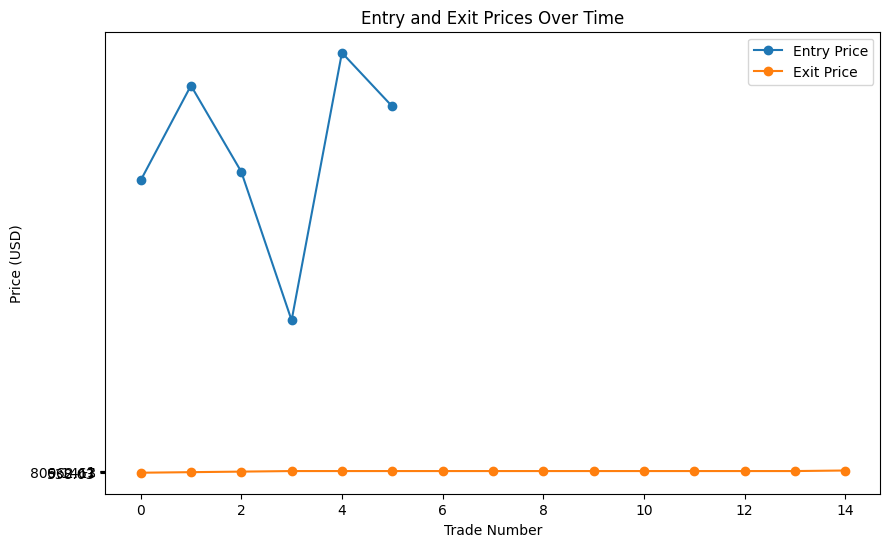

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'NVDA - NVDA.csv'
df = pd.read_csv(file_path)

# Fill NaN values in 'Exit(usd)' column with a placeholder (e.g., -1)
df['Exit(usd)'].fillna(-1, inplace=True)

# Convert 'Exit(usd)' column to strings
df['Exit(usd)'] = df['Exit(usd)'].astype(str)

# Display the DataFrame
print(df)

# Calculate and display some basic statistics
total_trades = len(df)
total_variance = df['Variance(usd)'].sum()
average_variance = df['Variance(usd)'].mean()

print(f"Total number of trades: {total_trades}")
print(f"Total variance: {total_variance}")
print(f"Average variance: {average_variance}")

# Plotting the Entry and Exit Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Entry(usd)'], label='Entry Price', marker='o')
plt.plot(df['Exit(usd)'], label='Exit Price', marker='o')
plt.title('Entry and Exit Prices Over Time')
plt.xlabel('Trade Number')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Profit and Loss Calculation:
Calculate and display the total profit or loss from all trades.

In [2]:
# Convert 'Exit(usd)' and 'Entry(usd)' columns to numeric, handling errors by setting them to NaN
df['Exit(usd)'] = pd.to_numeric(df['Exit(usd)'], errors='coerce')
df['Entry(usd)'] = pd.to_numeric(df['Entry(usd)'], errors='coerce')

# Calculate total profit/loss
df['Profit/Loss'] = df['Exit(usd)'] - df['Entry(usd)']
total_profit_loss = df['Profit/Loss'].sum()

print(f"Total Profit/Loss: {total_profit_loss}")

Total Profit/Loss: -1454.0711000000001


Winning and Losing Trades:
Identify and display the number of winning and losing trades.

In [3]:
# Categorize winning and losing trades
winning_trades = df[df['Exit(usd)'] > df['Entry(usd)']]
losing_trades = df[df['Exit(usd)'] < df['Entry(usd)']]

print(f"Number of Winning Trades: {len(winning_trades)}")
print(f"Number of Losing Trades: {len(losing_trades)}")

Number of Winning Trades: 3
Number of Losing Trades: 3


Maximum Drawdown:
Calculate and display the maximum drawdown during the trading period.

In [4]:
# Calculate maximum drawdown
drawdown = (df['Exit(usd)'] - df['Entry(usd)']).min()

print(f"Maximum Drawdown: {drawdown}")

Maximum Drawdown: -758.4424


Trade Duration Analysis:
Analyze the distribution of trade durations.

In [5]:
# Convert 'Date Variance in days' column to numeric, handling errors by setting them to NaN
df['Date Variance in days'] = pd.to_numeric(df['Date Variance in days'], errors='coerce')

# Calculate average and median trade duration
average_duration = df['Date Variance in days'].mean()
median_duration = df['Date Variance in days'].median()

print(f"Average Trade Duration: {average_duration} days")
print(f"Median Trade Duration: {median_duration} days")

Average Trade Duration: -18128.0 days
Median Trade Duration: 21.0 days
